# Analyse de données de systèmes éducatifs (World bank)
## Sujets à aborder :
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

### Chargement des jeux de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
data=pd.read_csv(".\Projet+Python_Dataset_Edstats_csv\EdStatsData.csv", sep = ',') #dataset principal
countries = pd.read_csv(".\Projet+Python_Dataset_Edstats_csv\EdStatsCountry.csv", sep =",") #dataset contenant des infos sur les pays

Affichage du dataset principal

In [2]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nettoyage des données

La dernière colonne semble non pertinente, visualisation du nombre de NaN

In [3]:
last_col = data["Unnamed: 69"]  #colonne potentiellement non pertinente
print(last_col.isna().mean())  #calcul de la moyenne des données manquantes sur la dernière colonne

1.0


La dernière colonne ne contient que des données NaN, elle peut être supprimée

In [4]:
data=data.drop("Unnamed: 69", axis = 1)  #suppression de la colonne car que des valeurs NaN

Etude des différents datasets

In [5]:
# Calcul du nombre d'indicateurs uniques via la colonne Indicator Code
indicators_nb=data["Indicator Code"]
print('Il y a {} indicateurs uniques dans le dataset principal'.format(indicators_nb.drop_duplicates().count()))
# Calcul du nombre de Pays dans le fichier EdStatsData via la colonne Country Code
countries_nb=data["Country Code"]
print('Il y a {} pays dans le dataset principal'.format(countries_nb.drop_duplicates().count()))
# Calcul du nombre d'années disponibles dans le dataset principal'
years=data.loc[:,'1970':'2100']
print('Il y a {} années disponibles'.format(years.shape[1]))
# Identification des doublons
print('Il y a {} doublons dans le dataset'.format(data.duplicated().sum()))

Il y a 3665 indicateurs uniques dans le dataset principal
Il y a 242 pays dans le dataset principal
Il y a 65 années disponibles
Il y a 0 doublons dans le dataset


Dans la liste des pays, certains pays semblent être des regroupements de pays (ex: Arab World ou Zone Euro).
Ces regroupements peuvent être identifiés par l'absence de devise monétaire. Supprimons ces regroupements

In [6]:
not_countries = countries.loc[countries["Currency Unit"].isna()] #Identification des regroupements grâce à l'absence de devise
data = data.drop(data[data["Country Code"].isin(not_countries["Country Code"])].index) #Suppression des lignes ne correspondant pas à des pays

L'objectif étant de viser un nombre important d'étudiants, les 'petits' pays, c'est à dire ceux de moins de 1 000 000 habitants sont supprimés

In [7]:
big_countries = data[data['Indicator Name']=='Population, total']['2010'] > 1000000
big_countries = data['Country Name'].unique()[big_countries]
data = data[data['Country Name'].isin(big_countries)]

Le dataset semble contenir beaucoup de valeurs manquantes. Un graphe en barres permet de visualiser par année le taux de valeur manquantes

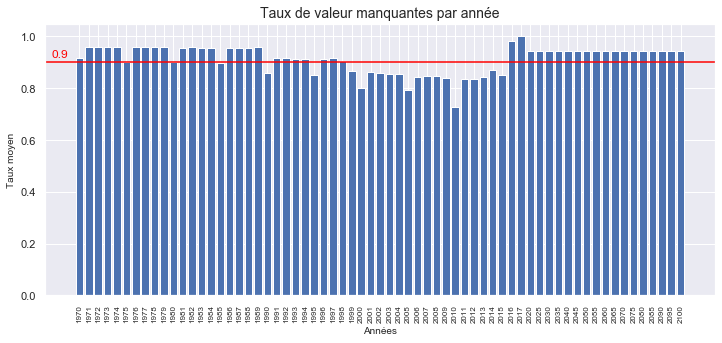

In [8]:
fig, ax=plt.subplots(figsize=(12,5))
bar_annee = ax.bar(years.columns, years.isna().mean())           # Graphe en barre du taux moyen de valeurs manquantes par année
plt.axhline(0.9, years.columns[0],years.columns[-1], c= 'red', ) # Droite indiquant un seuil de 90% de valeurs manquantes
ax.set_title('Taux de valeur manquantes par année', size = 14)
plt.xticks(rotation=90,size = 8)
ax.set_ylabel('Taux moyen',size=10)
ax.set_xlabel('Années', size = 10)
plt.annotate('0.9', (-3, 0.92), c='red')

plt.show()

Pour cette analyse, la période 1999-2015 est retenue.

In [9]:
data_present = data.drop(years.drop(years.loc[:,'1999':'2015'],axis=1), axis = 1)

Cette même analyse doit être faite sur les indicateurs pour l'année la mieux documentée.

In [10]:
# Identification du taux maximum de documentation et de l'année correspondante
taux_max = years.isna().mean().min()
année_max = years.isna().mean().idxmin(axis=1)
print("L'année la mieux documentée est",année_max,"avec",round((1-taux_max)*100,2), "% de remplissage")

L'année la mieux documentée est 2010 avec 27.33 % de remplissage


In [11]:
# Passage des codes indicateurs en index puis identification des valeurs manquantes
data_by_indicators = data_present.loc[:,['Indicator Name','2010']].set_index("Indicator Name")
data_by_indicators = data_by_indicators.isna().groupby("Indicator Name").mean()

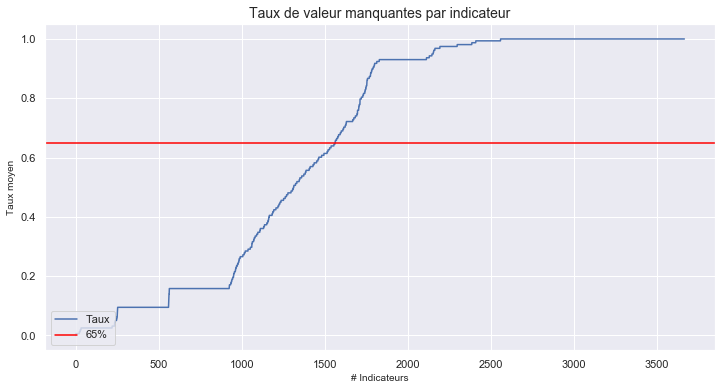

In [12]:
# Tracé de la courbe du taux de valeur manquante pour 2010
plt.figure(figsize=(12,6))
plt.plot(range(len(data_by_indicators)),data_by_indicators["2010"].sort_values(),label = 'Taux')
plt.axhline(0.65, 0, len(data_by_indicators), c= 'red', label ="65%")   #Droite indiquant un seuil de 65% de valeurs manquantes
plt.legend(loc='lower left')
plt.title('Taux de valeur manquantes par indicateur', size = 14)
plt.ylabel('Taux moyen',size=10)
plt.xlabel('# Indicateurs', size = 10)

plt.show()

Un peu plus de la moitié des indicateurs contiennent plus de 65% de valeurs manquantes. Ils sont écartés pour cette analyse

In [13]:
# Les indicateurs avec un taux de valeurs manquantes de -65% sont conservés
data_by_indicators = data_by_indicators[data_by_indicators["2010"]<0.65]

### Identification des indicateurs pertinents

Il reste 1440 indicateurs potentiels. Pour identifier les meilleurs, la description des indicateurs du site Worldbank est utilisée. <br>
Les indicateurs retenus sont les suivants :<br>
1) Pour l'analyse des meilleurs candidats
- 'Government expenditure on education as % of GDP (%)'
- 'GDP per capita (current US dollars)'
- 'Internet users (per 100 people)'
- 'Population, total'
- 'Enrolment in upper secondary education, both sexes (number)'
- 'Enrolment in tertiary education, all programmes, both sexes (number)'

2) Pour l'analyse de l'évolution potentielle
- 'Population, ages 0-14, total'
- 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total 
- 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total'

Ils sont stockés dans une variable

In [14]:
analysis_indic = ['Government expenditure on education as % of GDP (%)','GDP per capita (current US$)','Internet users (per 100 people)','Population, total','Population, ages 0-14, total',
                  'Enrolment in upper secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)', "Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total","Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total"]

In [15]:
data_final=data_present[data_present['Indicator Name'].isin(analysis_indic)]

### Analyse par région géographique
Dans un premier temps, les pays sont regroupés par région géographique pour une analyse plus globale

In [16]:
# Vérification que tous les pays possèdent une région
countries=countries[~countries["Country Code"].isin(not_countries["Country Code"])]
countries[countries["Region"].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,...,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gibraltar ne possède pas de région associée. Une valeur lui est assignée parmi la liste des régions

In [17]:
# Liste des régions
countries["Region"].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America', nan], dtype=object)

In [18]:
# Assignation de la région 'Europe & Central Asia' à Gibraltar
countries.loc[countries[countries['Country Code']=='GIB'].index,'Region']='Europe & Central Asia'

Les dataframes sont joints pour pouvoir analyser les régions et les indicateurs

In [19]:
data_analysis = data_final.merge(countries.iloc[:,:], how='left')
new_columns=['Country Name', 'Region', 'Indicator Name','2010']
data_analysis = data_analysis[new_columns]

Création d'un nouveau DataFrame contenant les valeurs de l'année 2010

In [20]:
data_2010=pd.DataFrame(index=data_analysis["Country Name"].unique(), columns=data_analysis["Indicator Name"].unique())
for index in data_2010.index:
    for column in data_2010.columns:
        if column not in data_analysis[(data_analysis["Country Name"]==index)]["Indicator Name"].unique() :
            value = float('NaN')
        else :
            value=data_analysis[(data_analysis["Country Name"]==index)&(data_analysis["Indicator Name"]==column)]["2010"].values[0]
        data_2010.loc[index,column]=value
for index in data_2010.index:
    data_2010.loc[index,"Region"]=data_analysis[data_analysis["Country Name"]==index]["Region"].values[0]

Les données doivent être regroupées par région. Cependant, certaines données ne peuvent pas simplement êtres sommées ou moyennées (ex: Internet users per 100 people ou expenditures as % of GDP)
Ces données doivent être calculées

In [21]:
data_2010["Internet users, total"]=data_2010["Internet users (per 100 people)"]*data_2010["Population, total"]/100
data_2010["Total GDP"]=data_2010["GDP per capita (current US$)"]*data_2010["Population, total"]
data_2010["Expenses on education"]=data_2010["Government expenditure on education as % of GDP (%)"]*data_2010["Total GDP"]/100

Le dataframe est groupé par région puis les indicateurs sont calculés pour ces régions

In [22]:
# Somme des données par région. On supprime les colonnes inintéressantes pour le moment
data_by_region_2010=data_2010.groupby(['Region']).sum()
data_by_region_2010["Internet users per 100 people"]=100*data_by_region_2010["Internet users, total"]/data_by_region_2010["Population, total"]
data_by_region_2010["GDP per capita"]=data_by_region_2010["Total GDP"]/data_by_region_2010["Population, total"]
data_by_region_2010["Expenses on education as % of GDP"]=100*data_by_region_2010["Expenses on education"]/data_by_region_2010["Total GDP"]

In [23]:
data_by_region_2010=data_by_region_2010.drop(data_by_region_2010.loc[:,'GDP per capita (current US$)':'Expenses on education'],axis = 1)

### Graphes par région pour différents indicateurs

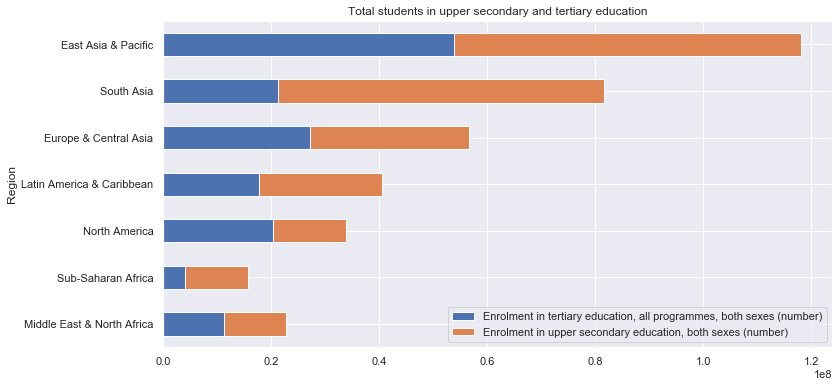

In [24]:
data_by_region_2010[["Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)"]].sort_values(by="Enrolment in upper secondary education, both sexes (number)").plot.barh(stacked=True,figsize=(12,6), title='Total students in upper secondary and tertiary education');

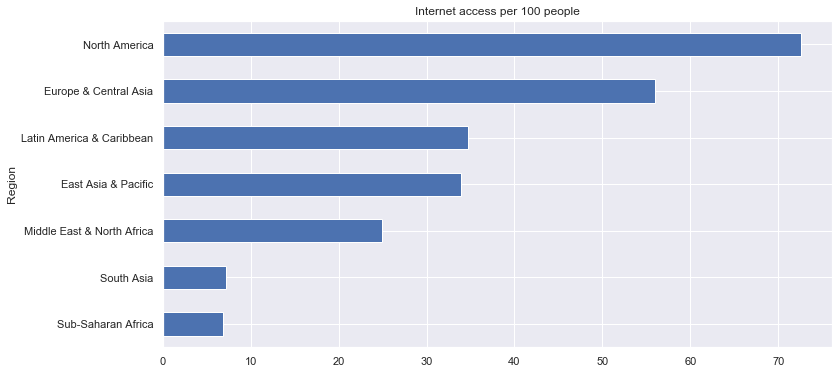

In [25]:
data_by_region_2010["Internet users per 100 people"].sort_values().plot.barh(stacked=True,figsize=(12,6),title='Internet access per 100 people');

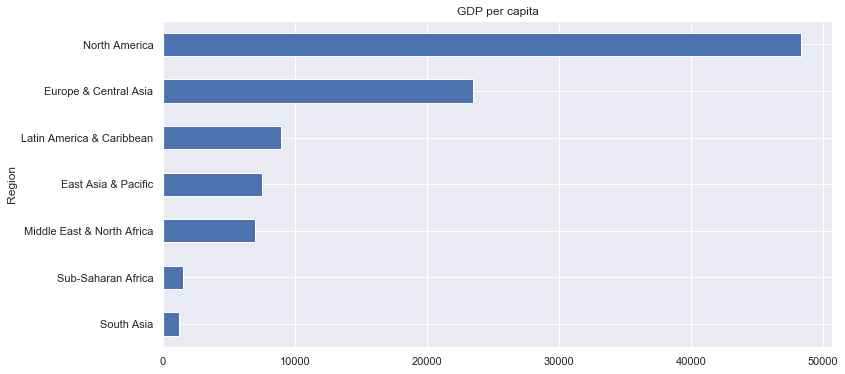

In [26]:
data_by_region_2010["GDP per capita"].sort_values().plot.barh(stacked=True,figsize=(12,6),title='GDP per capita');

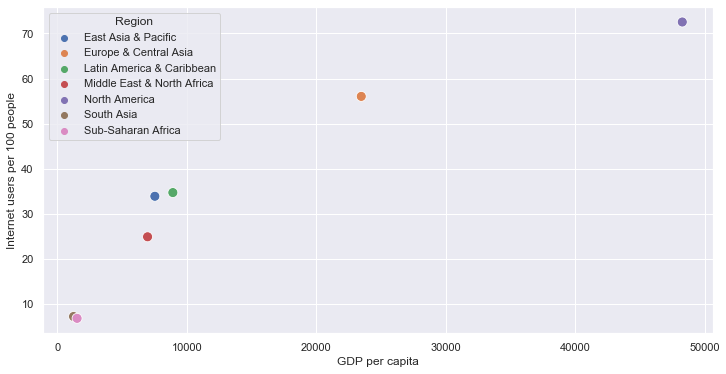

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_by_region_2010,x="GDP per capita", y="Internet users per 100 people",s=100, hue = data_by_region_2010.index);

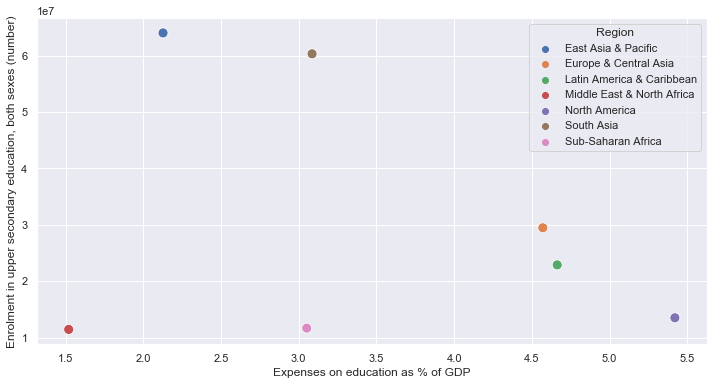

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_by_region_2010,x="Expenses on education as % of GDP", y="Enrolment in upper secondary education, both sexes (number)",s=100, hue = data_by_region_2010.index);

On remarque grâce à ces graphes que le nombre d'étudiants de la zone 'East Asia & Pacific' est bien plus important qu'ailleurs malgré un investissement dans l'éducation relativement faible
Un complément de formation est certainement nécessaire.
Concernant le PIB par habitant et l'accès Internet, l'Amérique du Nord et l'Europe/Asie Centrale sont bien mieux situés

Nous allons faire une étude par pays pour plus de précisions

## Analyse par pays

Sélection des données pertinentes

In [29]:
data_by_country_2010=pd.DataFrame(data_2010.loc[:,:"Internet users (per 100 people)"])
data_by_country_2010.loc[:,"Total students"]=data_by_country_2010.loc[:,"Enrolment in tertiary education, all programmes, both sexes (number)"]+data_by_country_2010.loc[:,"Enrolment in upper secondary education, both sexes (number)"]

### Graphe par pays de certains indicateurs

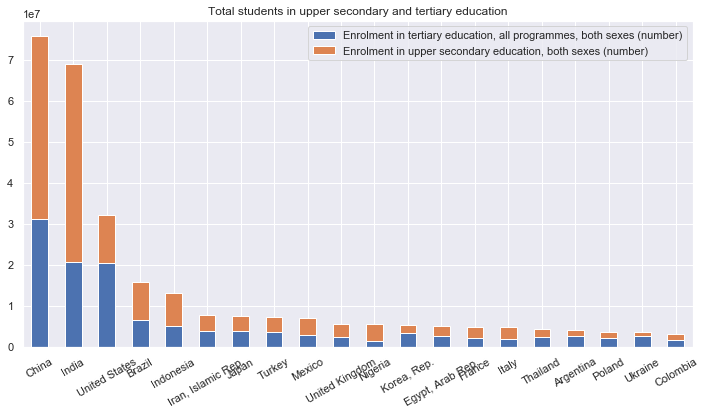

In [30]:
data_by_country_2010.sort_values(by="Total students",ascending = False).head(20).plot.bar(y=[0,1],stacked=True,figsize=(12,6), title='Total students in upper secondary and tertiary education',rot=30);

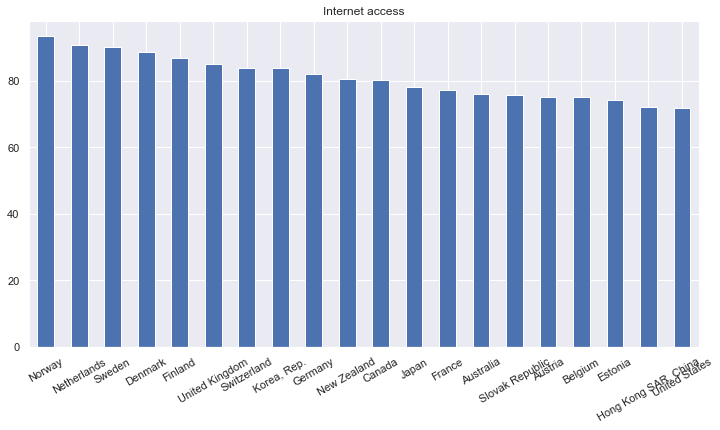

In [31]:
data_by_country_2010["Internet users (per 100 people)"].sort_values(ascending=False).head(20).plot.bar(stacked=True,figsize=(12,6),rot=30, title='Internet access');

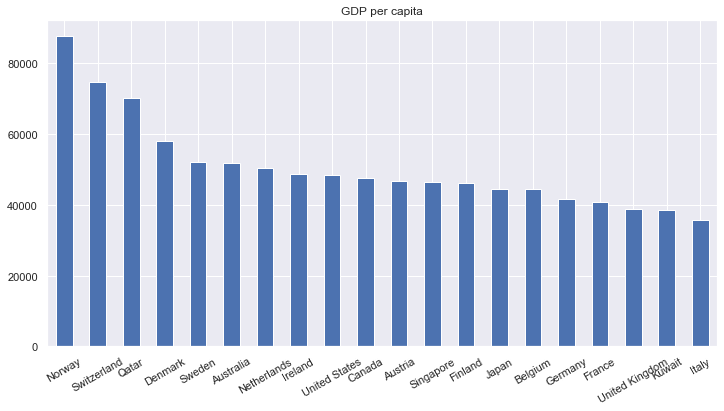

In [32]:
data_by_country_2010["GDP per capita (current US$)"].sort_values(ascending=False).head(20).plot.bar(stacked=True,figsize=(12,6),rot=30,title='GDP per capita');

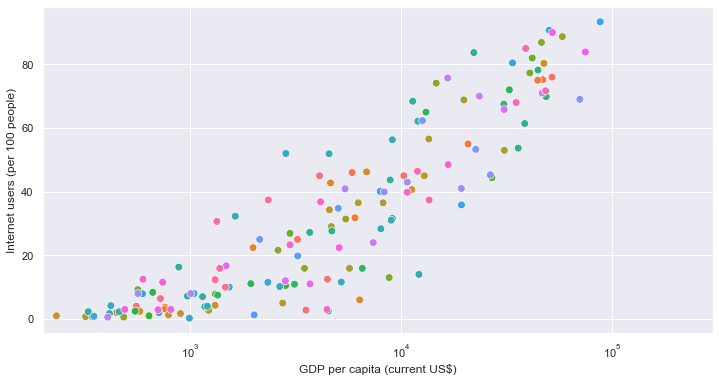

In [33]:
plt.figure(figsize=(12,6))
fig=sns.scatterplot(data=data_by_country_2010,x="GDP per capita (current US$)", y="Internet users (per 100 people)",s=60, hue = data_by_country_2010.index, legend=False);
fig.set(xlim=(200, 300000),xscale='log');

Corrélation entre l'accès Internet et le PIB par habitant

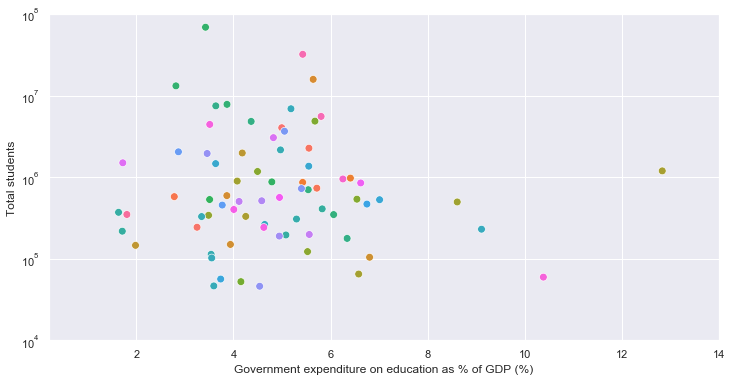

In [34]:
plt.figure(figsize=(12,6))
fig=sns.scatterplot(data=data_by_country_2010,x="Government expenditure on education as % of GDP (%)", y="Total students",s=60, hue = data_by_country_2010.index, legend=False);
fig.set(ylim=(10000, 100000000),yscale='log',xlim=(0.2,14));

Ces graphes par pays sont compliqués à analyser car le nombre de données est important.
Afin de visualiser plus facilement l'intéret d'un pays, un système de scoring basé sur ces indicateurs est pertinent, il faut pour ça :
- Normaliser chaque indicateur par la valeur max pour obtenir un score entre 0 et 1
- définir un coefficient à appliquer sur chaque indicateur

In [35]:
# L'accès à Internet étant indispensable et le nombre d'étudiants étant le nombre de client potentiels, leurs coefficients sont élevés : 3
# Le PIB mesure les possibilités économiques des clients mais le nombre possiblement élevé de client permettrait de rester compétitif en terme de prix, le coefficient est faible : 1
# Une hypothèse d'implantation dans les pays dépensant peu dans l'éducation est favorisée donc le coefficient est négatif et moyen : -2 
coeff_gdp=1 
coeff_exp=-2
coeff_int=3
coeff_stud=3
coeffs=[coeff_gdp,coeff_exp,coeff_int,coeff_stud]

Calcul du score final /10 et ajout de la colonne Région pour la visualisation en barres

In [36]:
#Remplacement des données manquantes par 0 pour éviter le non traitement des données NaN et garder le pays concerné dans la liste (ex : Chine)
scoring_data=data_by_country_2010.fillna(0).loc[:,'GDP per capita (current US$)':]/data_by_country_2010.loc[:,'GDP per capita (current US$)':].max()
scoring_data=10*scoring_data*coeffs/sum(coeffs)
scoring_data['Final score']=scoring_data.sum(axis=1)
scoring_data=scoring_data.merge(countries[['Table Name','Region']],left_index=True, right_on='Table Name', how='left').set_index('Table Name')
scoring_data.index=scoring_data.index.rename('Country Name')

Graphe en barre des pays avec le meilleur score

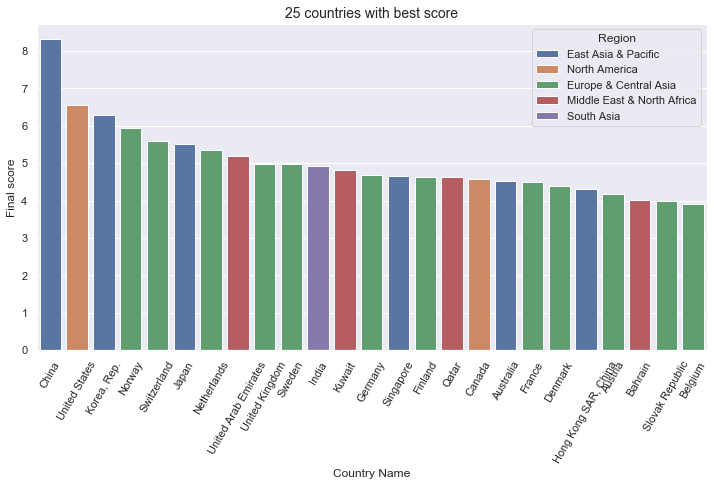

In [37]:
plt.figure(figsize=(12,6));
score_best=scoring_data.nlargest(25,columns="Final score");
fig=sns.barplot(data=score_best,x=score_best.index, y="Final score",hue = 'Region', dodge=False);
fig.set_xticklabels(labels=score_best.index, rotation=60);
fig.set_title('25 countries with best score', size = 14);

Visualisation de l'impact de chaque indicateur sur le score final

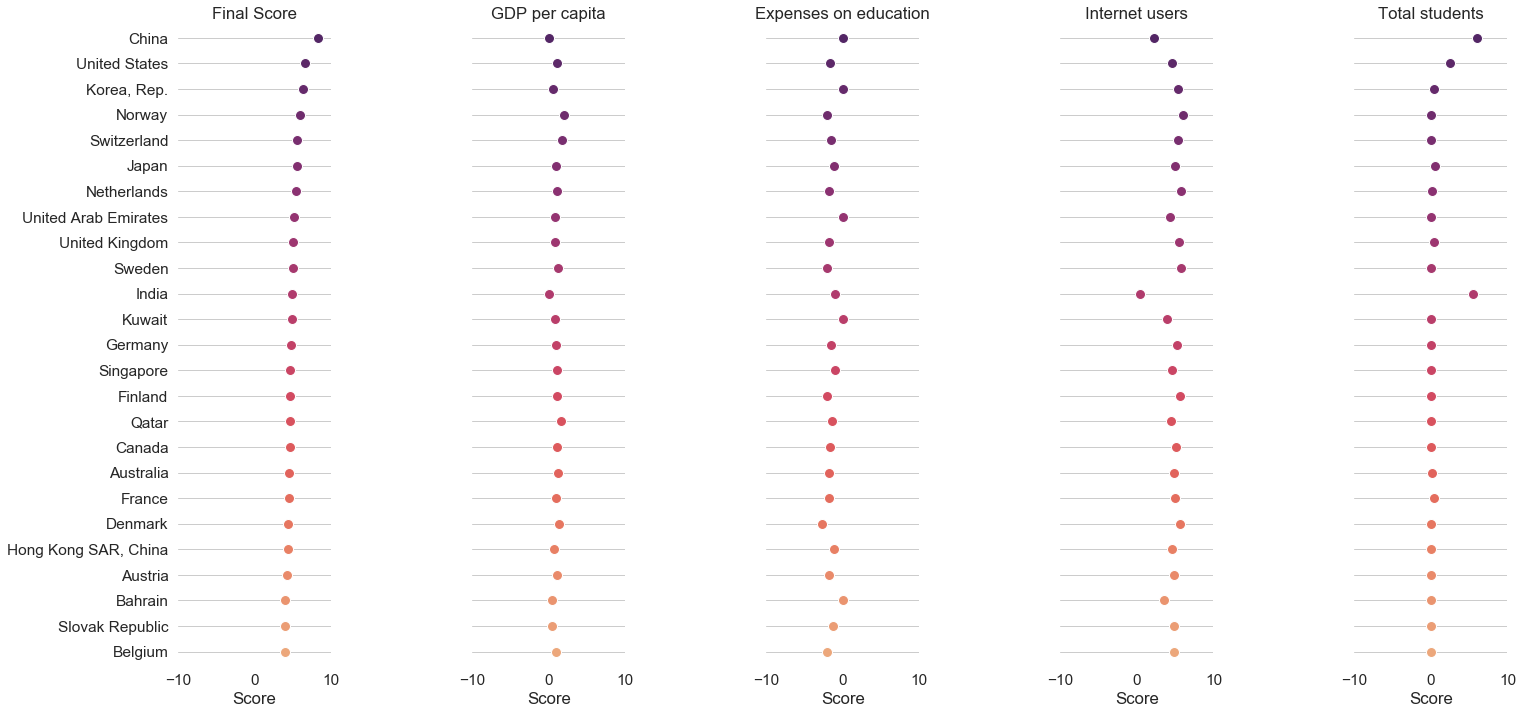

In [38]:
sns.set_theme(style="whitegrid", font_scale = 1.4)
score_best=score_best[["Final score","GDP per capita (current US$)","Government expenditure on education as % of GDP (%)","Internet users (per 100 people)","Total students","Region"]]
score_best['Country'] = score_best.index 
# Make the PairGrid
fig = sns.PairGrid(score_best,x_vars=score_best.columns[:5], y_vars=['Country'], height=10, aspect=0.4)

# Draw a dot plot using the stripplot function
fig.map(sns.stripplot, size=10, orient="h", jitter=False, palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
fig.set(xlim=(-10, 10), xlabel="Score", ylabel="")

# Make the grid horizontal instead of vertical
titles=["Final Score","GDP per capita","Expenses on education",'Internet users', 'Total students']
for ax,title in zip(fig.axes.flat,titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

## Evolution potentielle des meilleurs pays 

On étudie l'évolution des 10 meilleurs pays

In [39]:
top=scoring_data.nlargest(10,columns="Final score").index

In [40]:
evol_by_country=data_final[data_final["Country Name"].isin(top)].fillna(method='bfill',axis=1)

### Tracé des courbes par pays pour évolution court-terme

Construction des différents dataframes utilisés pour le tracé des courbes

In [41]:
evol_by_country_gdp=evol_by_country[evol_by_country["Indicator Name"]=="GDP per capita (current US$)"].set_index("Country Name").transpose().loc['1999':,:].drop(index='2015').astype('float64')
evol_by_country_gdp=evol_by_country_gdp.sort_values(by=evol_by_country_gdp.index[-1],ascending = False,axis=1)
evol_by_country_internet=evol_by_country[evol_by_country["Indicator Name"]=="Internet users (per 100 people)"].set_index("Country Name").transpose().loc['1999':,:].astype('float64')
evol_by_country_internet=evol_by_country_internet.sort_values(by=evol_by_country_gdp.index[-1],ascending = False,axis=1)
evol_by_country_sec=evol_by_country[evol_by_country["Indicator Name"]=="Enrolment in upper secondary education, both sexes (number)"].set_index("Country Name").transpose().loc['1999':,:].drop(index='2015').astype('float64')
evol_by_country_sec=evol_by_country_sec.sort_values(by=evol_by_country_sec.index[-1],ascending = False,axis=1)
evol_by_country_ter=evol_by_country[evol_by_country["Indicator Name"]=="Enrolment in tertiary education, all programmes, both sexes (number)"].set_index("Country Name").transpose().loc['1999':,:].astype('float64')
evol_by_country_ter=evol_by_country_ter.sort_values(by=evol_by_country_ter.index[-1],ascending = False,axis=1)
evol_by_country_exp=evol_by_country[evol_by_country["Indicator Name"]=="Government expenditure on education as % of GDP (%)"].set_index("Country Name").transpose().loc['1999':,:].astype('float64')
evol_by_country_exp=evol_by_country_exp.sort_values(by=evol_by_country_exp.index[-1],ascending = False,axis=1)
evol_by_country_youth=evol_by_country[evol_by_country["Indicator Name"]=="Population, ages 0-14, total"].set_index("Country Name").transpose().loc['1999':,:].astype('float64')
evol_by_country_youth=evol_by_country_youth.sort_values(by=evol_by_country_exp.index[-1],ascending = False,axis=1)

Tracé de l'évolution de ces indicateurs

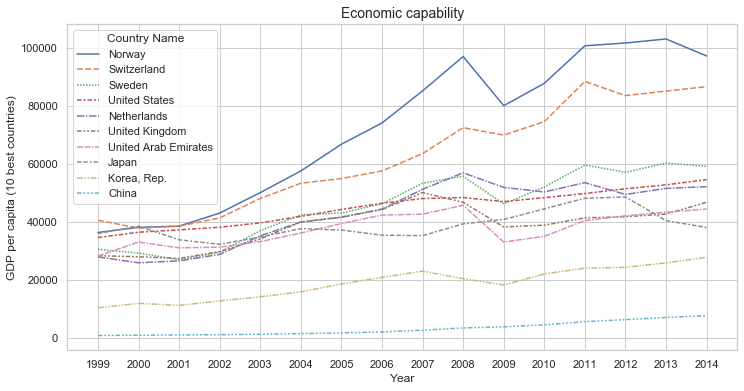

In [42]:
sns.set_theme(style="whitegrid", font_scale = 1)
plt.figure(figsize=(12,6))
fig=sns.lineplot(data=evol_by_country_gdp)
fig.set(xlabel='Year', ylabel='GDP per capita (10 best countries)', title='Economic capability')
fig.title.set_size(14)
plt.show()

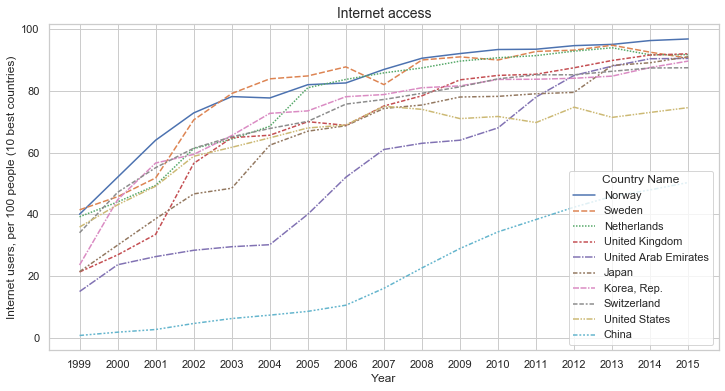

In [43]:
plt.figure(figsize=(12,6))
fig=sns.lineplot(data=evol_by_country_internet)
fig.set(xlabel='Year', ylabel='Internet users, per 100 people (10 best countries)', title= 'Internet access')
fig.title.set_size(14)
plt.show()

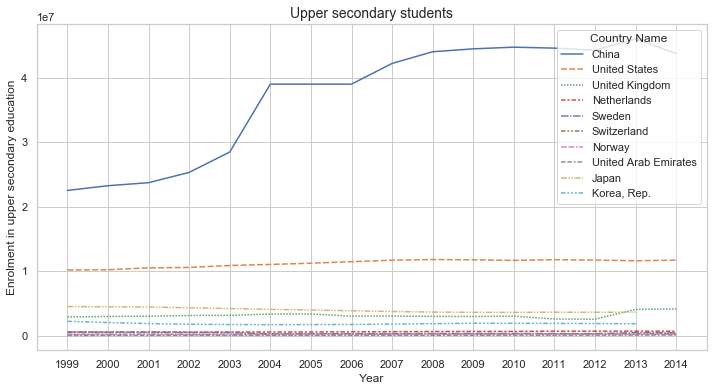

In [44]:
plt.figure(figsize=(12,6))
fig=sns.lineplot(data=evol_by_country_sec)
fig.set(xlabel='Year', ylabel='Enrolment in upper secondary education', title="Upper secondary students")
fig.title.set_size(14)
plt.show()

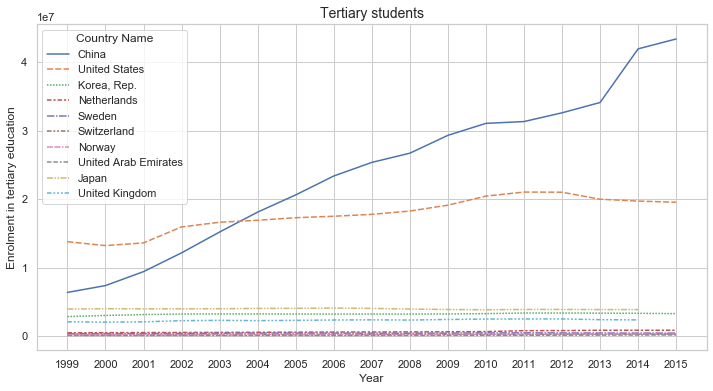

In [45]:
plt.figure(figsize=(12,6))
fig=sns.lineplot(data=evol_by_country_ter)
fig.set(xlabel='Year', ylabel='Enrolment in tertiary education', title='Tertiary students')
fig.title.set_size(14)
plt.show()

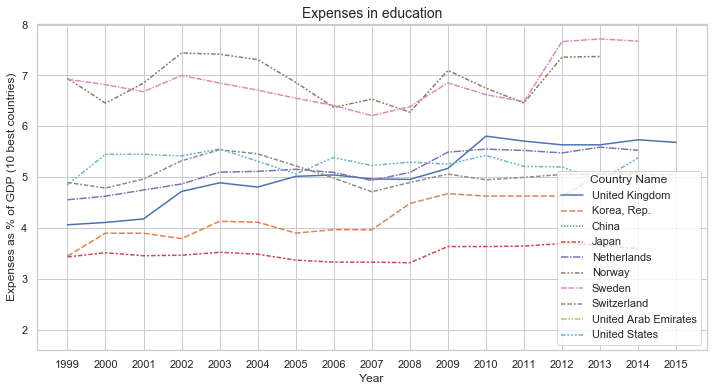

In [46]:
plt.figure(figsize=(12,6))
fig=sns.lineplot(data=evol_by_country_exp)
fig.set(xlabel='Year', ylabel='Expenses as % of GDP (10 best countries)', title='Expenses in education')
fig.title.set_size(14)
plt.show()

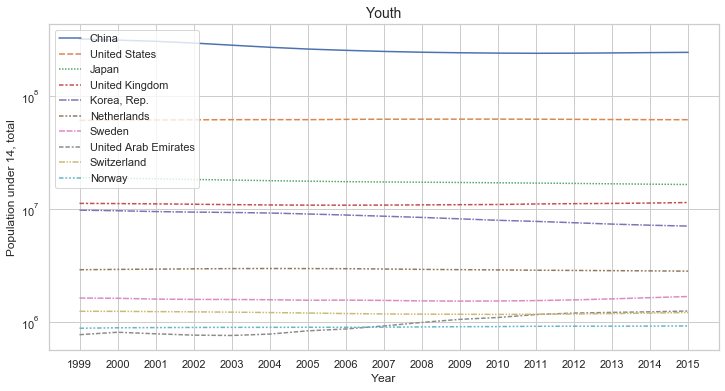

In [47]:
plt.figure(figsize=(12,6))
fig=sns.lineplot(data=evol_by_country_youth)
fig.set(xlabel='Year', ylabel='Population under 14, total', title= 'Youth')
fig.title.set_size(14)
fig.set_yscale('log')
plt.legend(loc='upper left')
plt.show()

Tracé des courbes pour évolution long-terme

In [48]:
indic_witt=["Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total","Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total"]

In [49]:
data_future=data.drop(data.loc[:,'1970':'2017'],axis=1).dropna(thresh=15)
data_future=data_future[data_future["Country Name"].isin(top)]
data_future=data_future[data_future["Indicator Name"].isin(indic_witt)]
data_future=data_future.groupby('Country Name').sum().transpose()

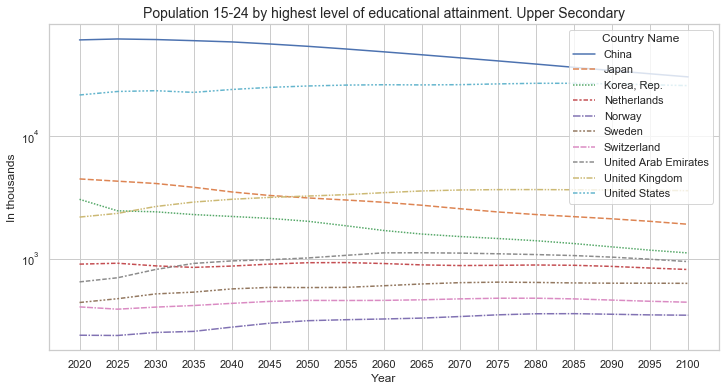

In [50]:
plt.figure(figsize=(12,6))
fig=sns.lineplot(data=data_future)
fig.set(xlabel='Year', ylabel='In thousands', title='Population 15-24 by highest level of educational attainment. Upper Secondary')
fig.title.set_size(14)
fig.set_yscale('log')
plt.show()

## Evolution de l'accès à Internet dans le monde

In [51]:
#Dataframes des données qui nous intéressent
data_final=data_present[data_present['Indicator Name'].isin(["Internet users (per 100 people)","Population, total"])]
data_final=data_final.set_index("Country Name")
internet_users_per100=data_final[data_final["Indicator Name"]=="Internet users (per 100 people)"]
pop=data_final[data_final["Indicator Name"]=="Population, total"]

In [52]:
#Initialisation du nouveau dataframe
internet_users=pd.DataFrame(columns=pop.columns)

#Calcul des données
for index in pop.index.values.tolist():
    for column in pop.columns.values[:3]:
        internet_users.loc[index,column] = pop.loc[index,column]
    for column in pop.columns.values[3:]:
        internet_users.loc[index,column] = pop.loc[index,column]*internet_users_per100.loc[index,column]/100
    internet_users.loc[index,'Indicator Name'] = 'Internet users, total'

#Concaténation des dataframes calculés
data_final_bis=data_final.append(internet_users)
data_final_bis.loc[:,'1999':]=data_final_bis.loc[:,'1999':].astype('float64')
data_final_bis=data_final_bis.drop(['Country Code','Indicator Code'],axis = 1)
data_final_bis=data_final_bis.merge(countries[['Table Name','Region']],left_index=True, right_on='Table Name', how='left')

Le dataframe est groupé par indicateur et region

In [53]:
# Somme des données par indicateur et région
data_by_region=data_final_bis.groupby(['Indicator Name','Region']).sum()

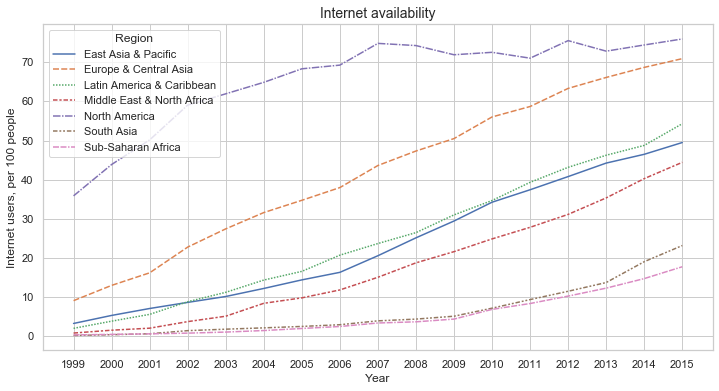

In [54]:
plt.figure(figsize=(12,6))
data_internet = 100*data_by_region.loc[('Internet users, total',slice(None)),:].reset_index(level=0,drop=True).transpose()/data_by_region.loc[('Population, total',slice(None)),:].reset_index(level=0,drop=True).transpose()
fig=sns.lineplot(data=data_internet)
fig.set(xlabel='Year', ylabel='Internet users, per 100 people', title='Internet availability')
fig.title.set_size(14)
plt.show()

# Visualisation sur planisphère

In [55]:
pip install folium; #Installation du module folium permattant de visualiser les données sur une carte

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Installation'


In [56]:
#Changement de certains noms de pays pour correspondre aux noms du module folium
scoring_data['Country Name'] = scoring_data.index
scoring_data.replace('Russian Federation', "Russia", inplace = True)
scoring_data.replace('United States', "United States of America", inplace = True)
scoring_data.replace('Venezuela, RB', "Venezuela", inplace = True)
scoring_data.replace('Egypt, Arab Rep.', "Egypt", inplace = True)
scoring_data.replace('Gambia, The', "Gambia", inplace = True)
scoring_data.replace('Guinea-Bissau', "Guinea Bissau", inplace = True)
scoring_data.replace("Cote d'Ivoire", "Ivory Coast", inplace = True)
scoring_data.replace('Congo, Dem. Rep.', "Democratic Republic of the Congo", inplace = True)
scoring_data.replace('Congo, Rep.', "Republic of the Congo", inplace = True)
scoring_data.replace('Macedonia, FYR', "Macedonia", inplace = True)
scoring_data.replace('Serbia', "Republic of Serbia", inplace = True)
scoring_data.replace('Slovak Republic', "Slovakia", inplace = True)
scoring_data.replace('Syrian Arab Republic', "Syria", inplace = True)
scoring_data.replace('Iran, Islamic Rep.', "Iran", inplace = True)
scoring_data.replace('Yemen, Rep.', "Yemen", inplace = True)
scoring_data.replace('Kyrgyz Republic', "Kyrgyzstan", inplace = True)
scoring_data.replace('Lao PDR', "Laos", inplace = True)
scoring_data.replace('Korea, Dem. People’s Rep.', "North Korea", inplace = True)
scoring_data.replace('Korea, Rep.', "South Korea", inplace = True)

In [57]:
#Chargement des données de latitude et longitude des pays puis tri sur les 10 meilleurs pays
country_position=pd.read_csv('country_position.csv', encoding='utf-8',sep='\t')
top_marker=scoring_data.nlargest(10,columns="Final score")
country_position.replace('United States','United States of America',inplace = True)
top_marker.index=top_marker.index.rename('Index')
top_marker=top_marker.merge(country_position, how='left', left_on='Country Name', right_on='name')[['Country Name', 'latitude','longitude','Final score']]

In [58]:
import folium as fm
#Creation de la carte
fig = fm.Figure(width=800, height=400)
m = fm.Map(width=800,height=400, zoom_start=1, location=[40, 0]).add_to(fig)

#Chargement des données décrivant les pays
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

#Ajout du calque Chloropleth sur la carte
fm.Choropleth(
    geo_data=country_shapes,
    name='choropleth Education score',
    data=scoring_data,
    columns=["Country Name", 'Final score'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    nan_fill_color='grey'
).add_to(m);



for lat, lon, name, score in zip(top_marker['latitude'],top_marker['longitude'],top_marker['Country Name'], top_marker['Final score']):
    text='<b>'+name+'</b>'+'<br>Score : '+str(round(score,2))
    #Creation des marqueurs
    fm.Marker(
    #Coordonnées des pays
    location=[lat, lon],
    #texte qui s'affiche au clic
    popup=fm.Popup(text,max_width=150)
    ).add_to(m)

fig

In [59]:
fig.save("map.html")